In [34]:
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
from glob import glob
from tqdm import tqdm_notebook as tqdm
from nirvana.data.manga import MaNGAGasKinematics, MaNGAStellarKinematics
from nirvana.models.higher_order import bisym_model
from nirvana.util.fits_prep import fileprep
from nirvana.models.geometry import projected_polar
from nirvana.util.fits_prep import makealltable
from mpl_toolkits.axes_grid1 import make_axes_locatable as mal
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, LinearSegmentedColormap
from scipy.signal import savgol_filter
%matplotlib notebook

In [176]:
args, resdict = fileprep('/media/brian/bdigiorg/nirvana/lux/barred/sample/nirvana_8078-12703_Gas.fits', rootdir='/media/brian/bdigiorg/manga/spectro/')

Reading /media/brian/bdigiorg/manga/spectro/redux/DR17/8078/stack/manga-8078-12703-LOGCUBE.fits.gz ... 
Done
Reading /media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/8078/12703/manga-8078-12703-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz ... 
Done
----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: 0.2 +/- 0.0
                Y center: 0.0 +/- 0.0
          Position Angle: 7.5 +/- 0.0
             Inclination: 30.5 +/- 0.1
       Systemic Velocity: 3.3 +/- 0.0
----------
Rotation curve parameters:
    RC: Asymptotic value: 159.3 +/- 0.1
               RC: Scale: 3.4 +/- 0.0
----------
Velocity measurements: 2773
Velocity chi-square: 145872.16459275514
Reduced chi-

In [2]:
resdict['pa'] = 0
pabs = [0,45,90,180]
plt.figure(figsize=(4,5.5))
for i in range(len(pabs)):
    plt.subplot(2,2,i+1)
    resdict['pab'] = pabs[i]
    velmodel, sigmodel = bisym_model(args,resdict)
    im = plt.imshow(args.kin.remap(velmodel), cmap='Spectral')
    plt.title(f'$\phi - \phi_b = {{{pabs[i]}}}^\circ$')
    plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    cax = mal(plt.gca()).append_axes('bottom', size='5%', pad=0)
    plt.colorbar(im, cax=cax, orientation='horizontal',label='km/s')
plt.tight_layout()
plt.savefig('relpabcomparison.pdf',format='pdf')

NameError: name 'resdict' is not defined

In [38]:
def projectedpab(pab, pa, inc, degrees=True, relpab=False):
    _pab, _pa, _inc = np.radians((pab, pa, inc)) if degrees else (pab, pa, inc)
    adjust = _pab > np.pi
    if not relpab: _pab -= _pa
    projpab = np.arctan(np.tan(_pab) * np.cos(_inc)) + _pa
    return (np.degrees(projpab) % 180 + 180*adjust) % 360

angs = []
pabs = []
pabes = []
deprojs = []
vts = []
v2ts = []
v2rs = []
#margs, mresdict = fileprep('data/lux/fullrun/nirvana_8078-12703_Gas.fits')
for i,ang in enumerate(np.arange(0,181,15)):
    try:
        f = fits.open(f'/media/brian/bdigiorg/nirvana/lux/mocks/pabbias/807812703fixednewpab{ang}.fits')
        pabs += [f[1].data['pab'][0]]
        pabes += [f[1].data['pabu'][0] - f[1].data['pabl'][0]]
        angs += [ang]
        vts += [f[1].data['vt'][~f[1].data['velmask']]]
        v2ts += [f[1].data['v2t'][~f[1].data['velmask']]]
        v2rs += [f[1].data['v2r'][~f[1].data['velmask']]]
        pab = projectedpab(f[1].data['pab'][0], f[1].data['pa'][0], f[1].data['inc'][0], relpab=True)
        deprojs += [pab]
        print(f'{ang}: deproj: {pab} proj: {f[1].data["pab"]} pa: {f[1].data["pa"]} inc: {f[1].data["inc"]}')
        #plt.figure(figsize=(12,4))
        #plt.subplot(131)
        #plt.suptitle(ang)
        #plt.imshow(f['vel'].data, cmap = 'RdBu')
        #plt.subplot(132)
        #plt.imshow(f['vel_model'].data, cmap='RdBu')
        #plt.subplot(133)
        #plt.imshow(f['vel'].data - f['vel_model'].data, cmap='RdBu')
        #plt.colorbar()
        #plt.tight_layout()
    except Exception:
        print(f'{ang}: failed')

0: deproj: 149.84148597717285 proj: [141.84021] pa: [0.34956843] inc: [41.4212]
15: deproj: 23.820663452148438 proj: [26.746199] pa: [3.4751008] inc: [42.624626]
30: deproj: 46.19218444824219 proj: [50.402943] pa: [3.7508006] inc: [40.850357]
45: deproj: 62.48583984375 proj: [65.26833] pa: [3.465709] inc: [39.89614]
60: deproj: 73.7020034790039 proj: [74.75807] pa: [3.0712361] inc: [39.18797]
75: deproj: 82.3406753540039 proj: [81.878075] pa: [2.679419] inc: [38.529835]
90: deproj: 89.67969512939453 proj: [87.88167] pa: [2.3622835] inc: [37.866306]
105: deproj: 95.81602478027344 proj: [92.96744] pa: [2.0931454] inc: [37.186337]
120: deproj: 102.56729125976562 proj: [98.67598] pa: [1.8057312] inc: [36.597397]
135: deproj: 109.554931640625 proj: [104.88458] pa: [1.349601] inc: [36.083893]
150: failed
165: deproj: 143.36630249023438 proj: [137.54152] pa: [359.7944] inc: [36.236855]
180: deproj: 179.38037538528442 proj: [179.01633] pa: [0.08559021] inc: [44.202393]


<IPython.core.display.Javascript object>


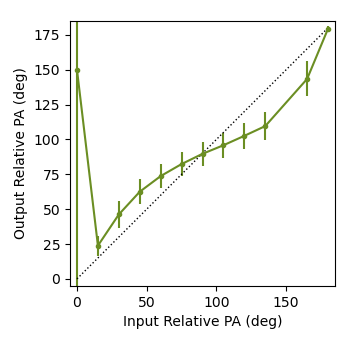

In [39]:
plt.figure(figsize=(3.5,3.5))
#plt.errorbar(angs, pabs, yerr=pabes, marker='.', ls='-', c='olivedrab', label='In plane')
plt.errorbar(angs, deprojs, yerr=pabes, marker='.', ls='-', c='olivedrab', label='In plane')
#plt.legend()
plt.plot(angs, angs, 'k:', lw=1)
plt.xlabel('Input Relative PA (deg)')
plt.ylabel('Output Relative PA (deg)')
plt.gca().set_aspect(1)
plt.xlim((-5,185))
plt.ylim((-5,185))
plt.tight_layout()
plt.savefig('pabbias.pdf', format='pdf')

In [40]:
fs = glob('/media/brian/bdigiorg/nirvana/lux/barred/sample/*Gas*fits')
pas = np.zeros(len(fs))
pabs = np.zeros(len(fs))
pabus = np.zeros(len(fs))
pabes = np.zeros(len(fs))
pabls = np.zeros(len(fs))
incs = np.zeros(len(fs))
deprojs = np.zeros(len(fs))
vts = []
v2ts = []
v2rs = []
pis = []
ids = []
for i in tqdm(range(len(fs))):
    with fits.open(fs[i]) as f:
        pas[i] = f[1].data['pa']
        pabs[i] = f[1].data['pab']
        pabus[i] = f[1].data['pabu']
        pabls[i] = f[1].data['pabl']
        pabes += [f[1].data['pabu'][0] - f[1].data['pabl'][0]]
        incs[i] = f[1].data['inc']
        deprojs[i] = projectedpab(pabs[i], pas[i], incs[i], relpab=False)
        pis += [f[0].header['plateifu']]
        ids += [f[0].header['mangaid']]
        vts += [f[1].data['vt'][~f[1].data['velmask']]]
        v2ts += [f[1].data['v2t'][~f[1].data['velmask']]]
        v2rs += [f[1].data['v2r'][~f[1].data['velmask']]]

Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1118 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


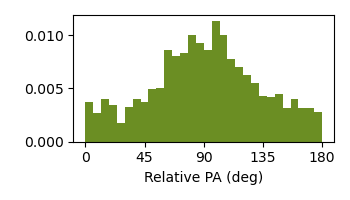

In [76]:
plt.figure(figsize=(3.5,2))
diffs = (np.array(deprojs)) % 360
hist, bins, plot = plt.hist(np.abs(180-diffs), bins=30, density=True, range=(0,180), color='olivedrab')
#[plt.axvline(v, c='k', ls='--', lw=1) for v in [0,90,180,270,360]]
plt.xticks([0,45,90,135,180])
plt.xlabel('Relative PA (deg)')
plt.tight_layout()
plt.savefig('relpabhist.pdf', format='pdf')

<IPython.core.display.Javascript object>


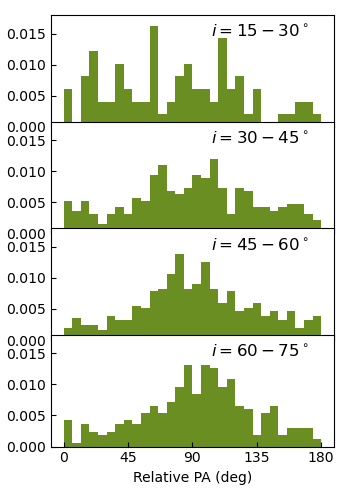

15-30: 82
30-45: 319
45-60: 423
60-75: 278


In [79]:
incbins = [15,30,45,60,75]
plt.figure(figsize=(3.5,5))
for i in range(len(incbins)-1):
    plt.subplot(4,1,i+1)
    cut = (incs > incbins[i]) & (incs < incbins[i+1])
    print(f'{incbins[i]}-{incbins[i+1]}: {cut.sum()}')
    absdiffs = np.abs(180 - ((deprojs[cut]) % 360))
    plt.hist(absdiffs, bins=30, density=True, range=(0,180), color='olivedrab')
    #plt.hist(relgz[cut], bins=30, histtype='step', color='k', density=True, label='GZ')
    #[plt.axvline(v, c='.5', ls='--', lw=1) for v in [0,90,180]]
    plt.text(.74,.8,f'$i={{{incbins[i]}}}-{{{incbins[i+1]}}}^\circ$', transform=plt.gca().transAxes, 
             horizontalalignment='center', fontsize=12)
    plt.xticks([0,45,90,135,180])
    plt.tick_params(labelbottom=False, direction='in')
    plt.ylim((0,.018))
plt.tick_params(labelbottom=True, direction='in')
plt.xlabel('Relative PA (deg)')
plt.tight_layout(h_pad=-1)
plt.savefig('relpabinchists.pdf', format='pdf')

<IPython.core.display.Javascript object>


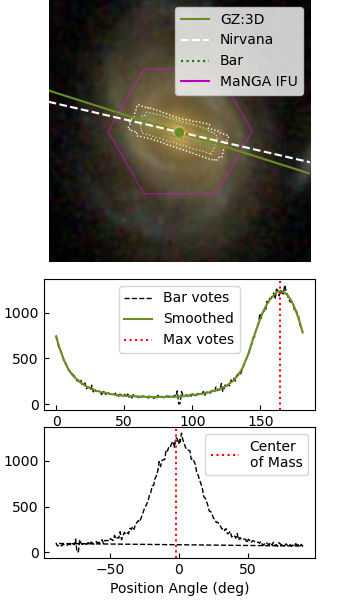

In [200]:
def gzbarang(gz,plot=False, returncen=False):
    bar = gz[4].data
    xx = np.linspace(0,bar.shape[0],bar.shape[0])
    yy = np.linspace(0,bar.shape[1],bar.shape[1])
    x,y = np.meshgrid(xx,yy)
    xcen = np.average(x, weights=bar)
    ycen = np.average(y, weights=bar)
    x -= xcen
    y -= ycen
    r = np.sqrt(x**2 + y**2)
    th = (np.degrees(np.arctan2(y,x))) % 180
    degs = np.linspace(0,180,181)
    tots = np.zeros(180)
    for i in range(180):
        cut = (th > degs[i]) & (th < degs[i+1])
        tots[i] = np.sum(bar[cut])
    smoothtots = savgol_filter(tots, 19, 2)
    maxbin = degs[np.argmax(smoothtots)]

    centtots = np.zeros(180)
    centdegs = (degs-maxbin)
    for i in range(180):
        cut = ((th-maxbin)%180 > degs[i]) & ((th-maxbin)%180 < degs[i+1])
        centtots[i] = np.sum(bar[cut])
    cen = (np.average((degs[:-1]+90)%180 - 90, weights=centtots))
    pab = (maxbin + cen + 90) % 180
    r = np.sqrt(x**2 + y**2)
    th = np.degrees(np.arctan2(y,x))
    #plt.figure(figsize=(8,8))
    #plt.subplot(221)
    #plt.imshow(r)
    #plt.subplot(222)
    #plt.imshow(th)
    major = ((th-95)%180 < pab) & ((th-85)%180 > pab) * (bar > .2*len(gz[10].data))
    minor = ((th-5)%180 < pab) & ((th+5)%180 > pab) * (bar > .2*len(gz[10].data))
    #plt.subplot(223)
    #plt.imshow(major)
    #plt.subplot(224)
    #plt.imshow(minor)
    barlength = np.max(r[major])
    barwidth = np.max(r[minor])
    
    if returncen: return pab, (xcen, ycen), barlength, barwidth
    return pab, (xcen, ycen), tots, smoothtots, maxbin, centtots, cen

def prepfiles(plate, ifu, stellar=False,dir='barred',root='/media/brian/bdigiorg/'):
    vftype = 'Stars' if stellar else 'Gas'
    f = fits.open(f'/media/brian/bdigiorg/nirvana/lux/{dir}/nirvana_{plate}-{ifu}_{vftype}.fits')
    maps = fits.open(f'{root}/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/{plate}/{ifu}/manga-{plate}-{ifu}-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz')
    projpab = projectedpab(f[1].data['pab'], f[1].data['pa'], f[1].data['inc'])
    gz = fits.open(glob(f'{root}/GZ3D/gz3d_{f[0].header["mangaid"]}*.fits.gz')[0])
    drpall = fits.open(f'{root}/manga/spectro/redux/DR17/drpall-v3_1_1.fits')[1].data
    drp = drpall[drpall['plateifu'] == f'{plate}-{ifu}']
    d = {}
    for k in ['f','maps','gz','projpab','drp']:
        exec(f'd["{k}"] = {k}')
    return d

plate, ifu, vftype = (8078,12703,'Gas')
fname = f'data/lux/{dir}/nirvana_{plate}-{ifu}_{vftype}.fits'
d = prepfiles(plate,ifu,vftype=='Stars',dir='barred/sample/')
for i in range(len(d['gz'])):
    d['gz'][i].data = np.flip(d['gz'][i].data, 0)
drpall = fits.open('/media/brian/bdigiorg/manga/spectro/redux/DR17/drpall-v3_1_1.fits')[1].data
drp = drpall[drpall['plateifu']==f'{plate}-{ifu}']

vel = np.ma.array(d['maps']['emline_gvel'].data[0], mask=d['maps']['emline_gvel_mask'].data[0])
nang = d['f'][1].data['pab']
ncen = (d['f'][1].data['xc'], d['f'][1].data['yc'])
ppa = drp['nsa_elpetro_phi']

f = plt.figure(figsize=(3.5,6))
gs = f.add_gridspec(3,1,height_ratios=[2,1,1], hspace=.1, top=1, bottom=.07)
#plt.subplot(211)
ax1 = f.add_subplot(gs[0])
plt.imshow(d['gz'][0].data, origin='lower')
plt.tick_params(left=None, bottom=None, labelleft=None, labelbottom=None)
bar = d['gz'][4].data
xx = np.linspace(0,bar.shape[0],bar.shape[0])
yy = np.linspace(0,bar.shape[1],bar.shape[1])
x,y = np.meshgrid(xx,yy)

if bar.any():
    gzang, gzcen, tots, smoothtots, maxbin, centtots, cen = gzbarang(d['gz'])#, returncen=True)
    xcen = np.average(x, weights=bar)
    ycen = np.average(y, weights=bar)
    x -= xcen
    y -= ycen
    gzpab = gzang
    npab = d['projpab']
    gzpa = ppa
    npa = d['f'][1].data['pa']

    plt.contour(d['gz'][4].data,cmap='Greens',levels=2, linestyles=':', alpha=1, linewidths=1)
    plt.plot(x[0]+gzcen[0], x[0]*np.tan(np.radians(gzpab - 90)) + gzcen[1], 'olivedrab', label='GZ:3D')
    plt.plot(x[0]+gzcen[0], x[0]*np.tan(np.radians(npab - 90)) + gzcen[1], 'w--', label='Nirvana')
    plt.plot(*gzcen, 'o', c='olivedrab')

else: 
    xcen, ycen = (0,0)

plt.xlim((0,d['gz'][0].data.shape[0]))
plt.ylim((0,d['gz'][0].data.shape[1]))
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(Line2D([0], [0], label='Bar', color='g', ls=':'))
handles.append(Line2D([0], [0], label='MaNGA IFU', color='m', ls='-'))
plt.legend(handles=handles)
plt.axis('off')

#plt.subplot(413)
f.add_subplot(gs[1])
degs = np.linspace(0,181,180)
plt.plot(degs, tots, '--', c='k', lw=1, label='Bar votes')
plt.plot(degs, smoothtots, '-', c='olivedrab', label='Smoothed')
plt.axvline(maxbin, c='r', ls=':', label='Max votes')
plt.tick_params(direction='in')
plt.legend()
plt.ylabel('Number of Votes')

#plt.subplot(414)
f.add_subplot(gs[2])
plt.plot((degs+90)%180 - 90, centtots, 'k--', lw=1)#, label='Recentered votes')
plt.axvline(cen, c='r', ls=':', label='Center\nof Mass')
plt.xlabel('Position Angle (deg)')
plt.legend()
plt.tick_params(direction='in')
plt.ylabel('Number of Votes')

#plt.tight_layout(h_pad=0)
plt.savefig('gzbarang.pdf', format='pdf')

In [8]:
def gzbarang(gz,plot=False, returncen=False):
    #bar = gz[4].data
    #xx = np.arange(bar.shape[0])
    #yy = np.arange(bar.shape[0])
    #x,y = np.meshgrid(xx,yy)
    #fit = np.polyfit(x.flatten(),y.flatten(),1,w=bar.flatten())
    #return np.degrees(np.arctan(fit[0])) % 180, fit[0]
    bar = gz[4].data
    xx = np.linspace(0,bar.shape[0],bar.shape[0])
    yy = np.linspace(0,bar.shape[1],bar.shape[1])
    x,y = np.meshgrid(xx,yy)
    xcen = np.average(x, weights=bar)
    ycen = np.average(y, weights=bar)
    x -= xcen
    y -= ycen
    r = np.sqrt(x**2 + y**2)
    th = (np.degrees(np.arctan2(y,x))) % 180
    degs = np.linspace(0,180,181)
    tots = np.zeros(180)
    for i in range(180):
        cut = (th > degs[i]) & (th < degs[i+1])
        tots[i] = np.sum(bar[cut])
    smoothtots = savgol_filter(tots, 19, 2)
    pab = degs[np.argmax(smoothtots)]

    centtots = np.zeros(180)
    centdegs = (degs-pab)
    for i in range(180):
        cut = ((th-pab)%180 > degs[i]) & ((th-pab)%180 < degs[i+1])
        centtots[i] = np.sum(bar[cut])
    cen = (np.average((degs[:-1]+90)%180 - 90, weights=centtots))
    if returncen: return pab+cen, (xcen, ycen)
    return (pab + cen + 90) % 180

def barangparallel(mangaid):
    try:
        f = glob(f'/media/brian/bdigiorg/GZ3D/gz3d_{mangaid}*.fits.gz')[0]
        with fits.open(f) as gz:
            for i in range(len(gz)):
                gz[i].data = np.flip(gz[i].data, 0)
            return gzbarang(gz, returncen=False)
    except ZeroDivisionError as e:
        print(mangaid, 'failed', e)
        return np.nan

#barids = drp['mangaid'][bars2]
with mp.Pool(6) as p:
    barangsmp = p.map(barangparallel, ids)
barangs90 = np.array(barangsmp)

1-837 failed Weights sum to zero, can't be normalized
1-411 failed Weights sum to zero, can't be normalized
1-380 failed Weights sum to zero, can't be normalized
1-54815 failed Weights sum to zero, can't be normalized
1-50480 failed Weights sum to zero, can't be normalized
1-50537 failed Weights sum to zero, can't be normalized
1-2333 failed Weights sum to zero, can't be normalized
1-2431 failed Weights sum to zero, can't be normalized
1-36456 failed Weights sum to zero, can't be normalized
1-36457 failed Weights sum to zero, can't be normalized
1-53488 failed Weights sum to zero, can't be normalized
1-207 failed Weights sum to zero, can't be normalized
1-323 failed Weights sum to zero, can't be normalized
1-277 failed Weights sum to zero, can't be normalized
1-46266 failed Weights sum to zero, can't be normalized
1-60709 failed Weights sum to zero, can't be normalized
1-27404 failed Weights sum to zero, can't be normalized
1-27654 failed Weights sum to zero, can't be normalized
1-3410

NameError: name 'barangs' is not defined

In [11]:
np.save('GZ3Dbarpas2', barangs90)

In [11]:
drp = fits.open('drpall-v3_1_1.fits')[1].data
ppas = np.zeros(len(fs))
indexes = np.zeros(len(fs))
for i,pi in enumerate(pis):
    indexes[i] = np.where(drp['plateifu'] == pi)[0][0]
    ppas[i] = drp['nsa_elpetro_phi'][drp['plateifu'] == pi]
    
ppabs = projectedpab(pabs, pas, incs, relpab=False)
barangs90 = np.load('GZ3Dbarpas2.npy')
diffs = (barangs90 - ppabs)%180
relgz = (barangs90 - ppas)%180
reln = (ppabs-90 - pas)%180

vtmaxs = np.array([np.max(v) for v in vts])
v2tmaxs = np.array([np.max(v) for v in v2ts])
v2rmaxs = np.array([np.max(v) for v in v2rs])
strong = (v2rmaxs/vtmaxs > .1) & (pabus-pabls < 30)

<IPython.core.display.Javascript object>


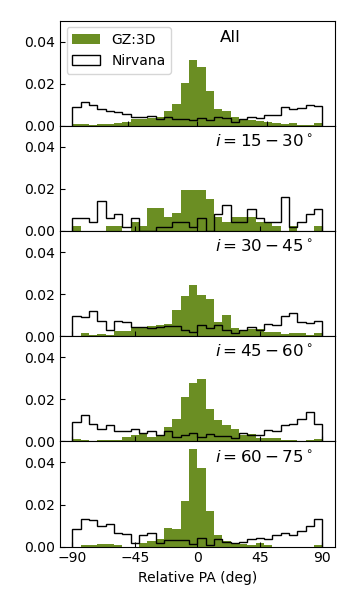

15-30: 82
30-45: 319
45-60: 423
60-75: 278


In [18]:
def recenter(arr, mod=180):
    return (arr - mod/2) % mod - mod/2

plt.figure(figsize=(3.5,6))
plt.subplot(5,1,1)
hist, bins, plot = plt.hist(recenter(relgz), bins=30, density=True, range=(-90,90), color='olivedrab', label='GZ:3D')
plt.hist(recenter(np.abs(180-deprojs)), bins=30, density=True, range=(-90,90), color='k', histtype='step', label='Nirvana')
#[plt.axvline(v, c='k', ls='--', lw=1) for v in [-90,0,90]]
plt.tick_params(labelbottom=False, direction='in')
plt.text(.58,.8,'All', transform=plt.gca().transAxes, fontsize=12)
plt.legend(loc=2)
plt.ylim((0,.05))

incbins = [15,30,45,60,75]
for i in range(len(incbins)-1):
    plt.subplot(5,1,i+2)
    cut = (incs > incbins[i]) & (incs < incbins[i+1])
    print(f'{incbins[i]}-{incbins[i+1]}: {cut.sum()}')
    absdiffs = np.abs(180 - ((deprojs[cut]) % 360))
    plt.hist(recenter(relgz[cut]), bins=30, density=True, range=(-90,90), color='olivedrab')
    plt.hist(recenter(absdiffs), bins=30, density=True, range=(-90,90), color='k', histtype='step')
    #[plt.axvline(v, c='k', ls='--', lw=1) for v in [-90,0,90]]
    plt.text(.74,.8,f'$i={{{incbins[i]}}}-{{{incbins[i+1]}}}^\circ$', transform=plt.gca().transAxes, 
             horizontalalignment='center', fontsize=12)
    plt.xticks([-90,-45,0,45,90])
    plt.tick_params(labelbottom=False, direction='in')
    plt.ylim((0,.05))
plt.tick_params(labelbottom=True, direction='in')
plt.xlabel('Relative PA (deg)')
plt.tight_layout(h_pad=-1)
plt.savefig('allrelpabhists.pdf', format='pdf')

In [45]:
apis = np.array(pis)
relgz[apis=='8078-12703']
reln[apis=='8078-12703']

array([152.30773823])

<IPython.core.display.Javascript object>


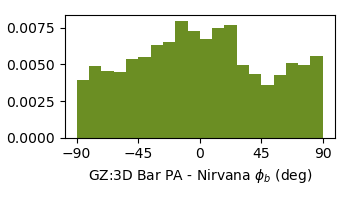

-1.5418951400969974


In [91]:
def recenter(arr, mod=180):
    return (arr - mod/2) % mod - mod/2

plt.figure(figsize=(3.5,2))
plt.hist(recenter(diffs), bins=20, color='olivedrab', density=True)
plt.xticks([-90,-45,0,45,90])
#plt.axvline(np.nanmedian(recenter(diffs)), c='k', ls='--', label='Median')
#plt.legend()
plt.xlabel(r'GZ:3D Bar PA - Nirvana $\phi_b$ (deg)')
plt.tight_layout()
print(np.nanmedian(recenter(diffs)))
plt.savefig('gzdiffshist.pdf',format='pdf')

<IPython.core.display.Javascript object>


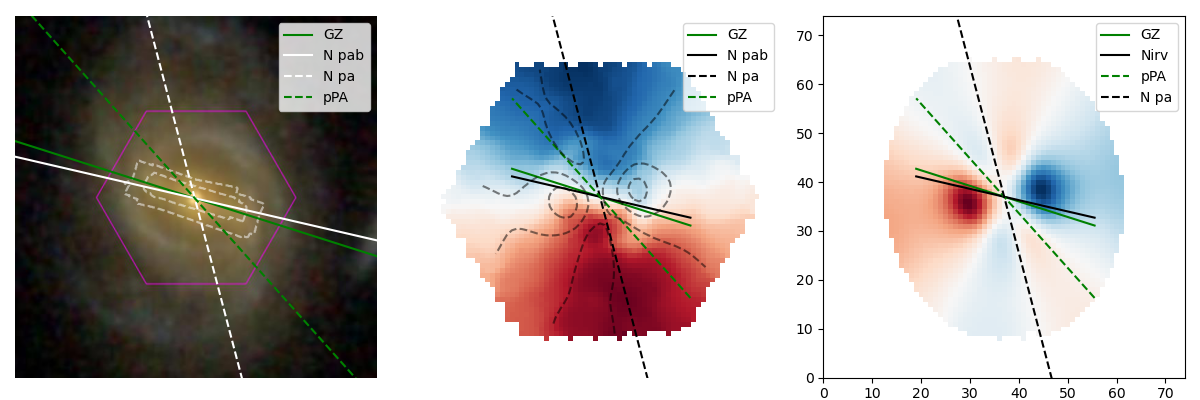

Reading /media/brian/bdigiorg/manga/spectro/redux/DR17/8078/stack/manga-8078-12703-LOGCUBE.fits.gz ... 
Done
Reading /media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/8078/12703/manga-8078-12703-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz ... 
Done
----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: 0.2 +/- 0.0
                Y center: 0.0 +/- 0.0
          Position Angle: 7.5 +/- 0.0
             Inclination: 30.5 +/- 0.1
       Systemic Velocity: 3.3 +/- 0.0
----------
Rotation curve parameters:
    RC: Asymptotic value: 159.3 +/- 0.1
               RC: Scale: 3.4 +/- 0.0
----------
Velocity measurements: 2773
Velocity chi-square: 145872.16459275514
Reduced chi-

NameError: name 'barangs' is not defined

In [23]:
def projectedpab(pab, pa, inc, degrees=True, relpab=False):
    _pab, _pa, _inc = np.radians((pab, pa, inc)) if degrees else (pab, pa, inc)
    adjust = _pab > np.pi
    if not relpab: _pab -= _pa
    projpab = np.arctan(np.tan(_pab) * np.cos(_inc)) + _pa
    return (np.degrees(projpab) % 180 + 180*adjust) % 360

def prepfiles(plate, ifu, stellar=False,dir='barred'):
    vftype = 'Stars' if stellar else 'Gas'
    f = fits.open(f'/media/brian/bdigiorg/nirvana/lux/{dir}/nirvana_{plate}-{ifu}_{vftype}.fits')
    maps = fits.open(f'/media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/{plate}/{ifu}/manga-{plate}-{ifu}-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz')
    projpab = projectedpab(f[1].data['pab'], f[1].data['pa'], f[1].data['inc'])
    gz = fits.open(glob(f'/media/brian/bdigiorg/GZ3D/gz3d_{f[0].header["mangaid"]}*.fits.gz')[0])
    drpall = fits.open('drpall-v3_1_1.fits')[1].data
    drp = drpall[drpall['plateifu'] == f'{plate}-{ifu}']
    d = {}
    for k in ['f','maps','gz','projpab','drp']:
        exec(f'd["{k}"] = {k}')
    return d

def plotpabs(plate,ifu,vftype='Gas', dir='barred/sample', minus=False):
    fname = f'/media/brian/bdigiorg/nirvana/lux/{dir}/nirvana_{plate}-{ifu}_{vftype}.fits'
    d = prepfiles(plate,ifu,vftype=='Stars',dir=dir)
    if minus: d['projpab'] *= -1
    for i in range(len(d['gz'])):
        d['gz'][i].data = np.flip(d['gz'][i].data, 0)
    drpall = fits.open('drpall-v3_1_1.fits')[1].data
    drp = drpall[drpall['plateifu']==f'{plate}-{ifu}']
    
    vel = np.ma.array(d['maps']['emline_gvel'].data[0], mask=d['maps']['emline_gvel_mask'].data[0])
    nang = d['f'][1].data['pab']
    ncen = (d['f'][1].data['xc'], d['f'][1].data['yc'])
    ppa = drp['nsa_elpetro_phi']

    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(d['gz'][0].data, origin='lower')
    bar = d['gz'][4].data
    xx = np.linspace(0,bar.shape[0],bar.shape[0])
    yy = np.linspace(0,bar.shape[1],bar.shape[1])
    x,y = np.meshgrid(xx,yy)
    
    if bar.any():
        gzang, gzcen, l, w = gzbaranglw(d['gz'], returncen=True)
        xcen = np.average(x, weights=bar)
        ycen = np.average(y, weights=bar)
        x -= xcen
        y -= ycen
        gzpab = gzang
        npab = d['projpab']
        gzpa = ppa
        npa = d['f'][1].data['pa']
        
        plt.contour(d['gz'][4].data,colors='w',levels=1, linestyles='--', alpha=.5)
        plt.plot(x[0]+gzcen[0], x[0]*np.tan(np.radians(gzpab - 90)) + gzcen[1], 'g', label='GZ')
        plt.plot(x[0]+gzcen[0], x[0]*np.tan(np.radians(npab - 90)) + gzcen[1], 'w', label='N pab')
        
        
    else: 
        xcen, ycen = (0,0)
            
    plt.plot(x[0]+gzcen[0], x[0]*np.tan(np.radians(npa - 90)) + gzcen[1], 'w--', label='N pa')
    plt.plot(x[0]+gzcen[0], x[0]*np.tan(np.radians(gzpa - 90)) + gzcen[1], 'g--', label='pPA')
    plt.xlim((0,d['gz'][0].data.shape[0]))
    plt.ylim((0,d['gz'][0].data.shape[1]))
    plt.legend()
    plt.axis('off')
    #return
    plt.subplot(132)
    x = d['maps']['spx_skycoo'].data[0]
    xcen = x.shape[0]//2
    plt.imshow(vel, cmap='RdBu', origin='lower')
    args, resdict = fileprep(fname, rootdir='/media/brian/bdigiorg/manga/spectro')
    z = np.zeros(len(resdict['vt']))
    vtdict, v2tdict, v2rdict = [resdict.copy(), resdict.copy(), resdict.copy()]
    vtdict['v2t'] = z
    vtdict['v2r'] = z
    v2tdict['vt'] = z
    v2tdict['v2r'] = z
    v2rdict['vt'] = z
    v2rdict['v2t'] = z
    velmodel, sigmodel = bisym_model(args, resdict, plot=True)
    vtmodel,  sigmodel = bisym_model(args, vtdict,  plot=True)
    v2tmodel, sigmodel = bisym_model(args, v2tdict, plot=True)
    v2rmodel, sigmodel = bisym_model(args, v2rdict, plot=True)
    plt.axis('off')

    if bar.any():
        plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(gzpab - 90)) + xcen, 'g', label='GZ')
        plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(npab - 90)) + xcen, 'k', label='N pab')
    plt.plot(x[0]+xcen, x[0]*np.tan(np.radians(npa - 90)) + xcen, 'k--', label='N pa')
    plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(gzpa - 90)) + xcen, 'g--', label='pPA')
    plt.contour(velmodel-vtmodel-v2tmodel,colors='k',levels=5, linestyles='--', alpha=.5)
    plt.xlim((0,x.shape[0]))
    plt.ylim((0,x.shape[1]))
    plt.legend()

    plt.subplot(133)
    plt.imshow(velmodel-vtmodel-v2tmodel,cmap='RdBu', origin='lower')
    if bar.any():
        plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(gzpab - 90)) + xcen, 'g', label='GZ')
        plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(npab - 90)) + xcen, 'k', label='Nirv')
    plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(gzpa - 90)) + xcen, 'g--', label='pPA')
    plt.plot(x[0]+xcen, x[0]*np.tan(np.radians(npa - 90)) + xcen, 'k--', label='N pa')
    plt.xlim((0,x.shape[0]))
    plt.ylim((0,x.shape[1]))
    plt.legend()
    plt.tight_layout()
    print(gzpab, npab)
    
def gzbaranglw(gz,plot=False, returncen=False):
    bar = gz[4].data
    xx = np.linspace(0,bar.shape[0],bar.shape[0])
    yy = np.linspace(0,bar.shape[1],bar.shape[1])
    x,y = np.meshgrid(xx,yy)
    xcen = np.average(x, weights=bar)
    ycen = np.average(y, weights=bar)
    x -= xcen
    y -= ycen
    r = np.sqrt(x**2 + y**2)
    th = (np.degrees(np.arctan2(y,x))) % 180
    degs = np.linspace(0,180,181)
    tots = np.zeros(180)
    for i in range(180):
        cut = (th > degs[i]) & (th < degs[i+1])
        tots[i] = np.sum(bar[cut])
    smoothtots = savgol_filter(tots, 19, 2)
    maxbin = degs[np.argmax(smoothtots)]

    centtots = np.zeros(180)
    centdegs = (degs-maxbin)
    for i in range(180):
        cut = ((th-maxbin)%180 > degs[i]) & ((th-maxbin)%180 < degs[i+1])
        centtots[i] = np.sum(bar[cut])
    cen = (np.average((degs[:-1]+90)%180 - 90, weights=centtots))
    pab = (maxbin + cen + 90) % 180
    r = np.sqrt(x**2 + y**2)
    th = np.degrees(np.arctan2(y,x))
    #plt.figure(figsize=(8,8))
    #plt.subplot(221)
    #plt.imshow(r)
    #plt.subplot(222)
    #plt.imshow(th)
    major = ((th-95)%180 < pab) & ((th-85)%180 > pab) * (bar > .2*len(gz[10].data))
    minor = ((th-5)%180 < pab) & ((th+5)%180 > pab) * (bar > .2*len(gz[10].data))
    #plt.subplot(223)
    #plt.imshow(major)
    #plt.subplot(224)
    #plt.imshow(minor)
    barlength = np.max(r[major])
    barwidth = np.max(r[minor])
    
    if returncen: return pab, (xcen, ycen), barlength, barwidth
    return pab
    
plate,ifu = (8078, 12703)
plotpabs(plate, ifu)
print(barangs[apis==f'{plate}-{ifu}'], ppabs[apis==f'{plate}-{ifu}'])

<IPython.core.display.Javascript object>


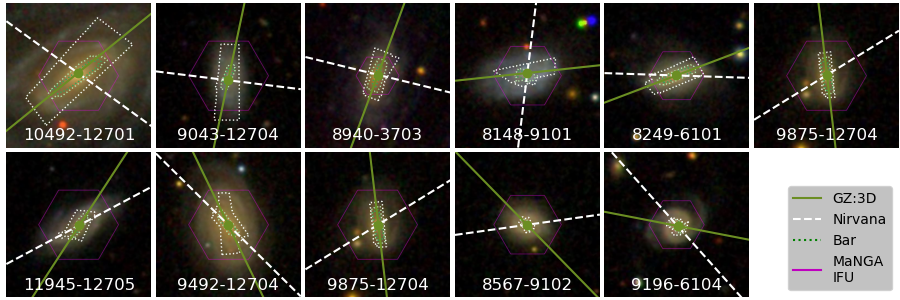

In [42]:
def gzbarang3(gz,plot=False, returncen=False):
    bar = gz[4].data
    xx = np.linspace(0,bar.shape[0],bar.shape[0])
    yy = np.linspace(0,bar.shape[1],bar.shape[1])
    x,y = np.meshgrid(xx,yy)
    xcen = np.average(x, weights=bar)
    ycen = np.average(y, weights=bar)
    x -= xcen
    y -= ycen
    r = np.sqrt(x**2 + y**2)
    th = (np.degrees(np.arctan2(y,x))) % 180
    degs = np.linspace(0,180,181)
    tots = np.zeros(180)
    for i in range(180):
        cut = (th > degs[i]) & (th < degs[i+1])
        tots[i] = np.sum(bar[cut])
    smoothtots = savgol_filter(tots, 19, 2)
    maxbin = degs[np.argmax(smoothtots)]

    centtots = np.zeros(180)
    centdegs = (degs-maxbin)
    for i in range(180):
        cut = ((th-maxbin)%180 > degs[i]) & ((th-maxbin)%180 < degs[i+1])
        centtots[i] = np.sum(bar[cut])
    cen = (np.average((degs[:-1]+90)%180 - 90, weights=centtots))
    pab = (maxbin + cen + 90) % 180
    r = np.sqrt(x**2 + y**2)
    th = np.degrees(np.arctan2(y,x))
    #plt.figure(figsize=(8,8))
    #plt.subplot(221)
    #plt.imshow(r)
    #plt.subplot(222)
    #plt.imshow(th)
    major = ((th-95)%180 < pab) & ((th-85)%180 > pab) * (bar > .2*len(gz[10].data))
    minor = ((th-5)%180 < pab) & ((th+5)%180 > pab) * (bar > .2*len(gz[10].data))
    #plt.subplot(223)
    #plt.imshow(major)
    #plt.subplot(224)
    #plt.imshow(minor)
    barlength = np.max(r[major])
    barwidth = np.max(r[minor])
    
    if returncen: return pab, (xcen, ycen), barlength, barwidth
    return pab, (xcen, ycen), tots, smoothtots, maxbin, centtots, cen

plt.figure(figsize=(9,3))
drpall = fits.open('/media/brian/bdigiorg/manga/spectro/redux/DR17/drpall-v3_1_1.fits')[1].data
n = 0
while n < 12:
    try:
        pi = np.random.choice(pis)
        plt.subplot(2,6,n+1)
        plate,ifu,vftype = (*pi.split('-'), 'Gas')
        d = prepfiles(plate,ifu,vftype=='Stars',dir='barred/sample/')
        for i in range(len(d['gz'])):
            d['gz'][i].data = np.flip(d['gz'][i].data, 0)
        drp = drpall[drpall['plateifu']==f'{plate}-{ifu}']

        vel = np.ma.array(d['maps']['emline_gvel'].data[0], mask=d['maps']['emline_gvel_mask'].data[0])
        nang = d['f'][1].data['pab']
        ncen = (d['f'][1].data['xc'], d['f'][1].data['yc'])
        ppa = drp['nsa_elpetro_phi']

        plt.imshow(d['gz'][0].data, origin='lower')
        plt.tick_params(left=None, bottom=None, labelleft=None, labelbottom=None)
        bar = d['gz'][4].data
        xx = np.linspace(0,bar.shape[0],bar.shape[0])
        yy = np.linspace(0,bar.shape[1],bar.shape[1])
        x,y = np.meshgrid(xx,yy)

        if bar.any():
            gzang, gzcen, tots, smoothtots, maxbin, centtots, cen = gzbarang3(d['gz'])#, returncen=True)
            xcen = np.average(x, weights=bar)
            ycen = np.average(y, weights=bar)
            x -= xcen
            y -= ycen
            gzpab = gzang
            npab = d['projpab']
            gzpa = ppa
            npa = d['f'][1].data['pa']

            plt.contour(d['gz'][4].data,cmap='Greens',levels=2, linestyles=':', alpha=1, linewidths=1)
            plt.plot(x[0]+gzcen[0], x[0]*np.tan(np.radians(gzpab - 90)) + gzcen[1], 'olivedrab', label='GZ:3D')
            plt.plot(x[0]+gzcen[0], x[0]*np.tan(np.radians(npab - 90)) + gzcen[1], 'w--', label='Nirvana')
            plt.plot(*gzcen, 'o', c='olivedrab')

        else: 
            xcen, ycen = (0,0)

        plt.xlim((0,d['gz'][0].data.shape[0]))
        plt.ylim((0,d['gz'][0].data.shape[1]))
        handles, labels = plt.gca().get_legend_handles_labels()
        handles.append(Line2D([0], [0], label='Bar', color='g', ls=':'))
        handles.append(Line2D([0], [0], label='MaNGA\nIFU', color='m', ls='-'))
        plt.axis('off')
        
        plt.text(.5,.05,pi,transform=plt.gca().transAxes,horizontalalignment='center',fontsize=12,c='w')
        
        n += 1
    except:
        print('failed')
plt.cla()
plt.axis('off')
plt.legend(handles=handles, facecolor='.7', loc=4)
plt.tight_layout(pad=0, h_pad=-.5, w_pad=-.5)
#plt.savefig('imagemosaic.pdf', format='pdf')

<IPython.core.display.Javascript object>


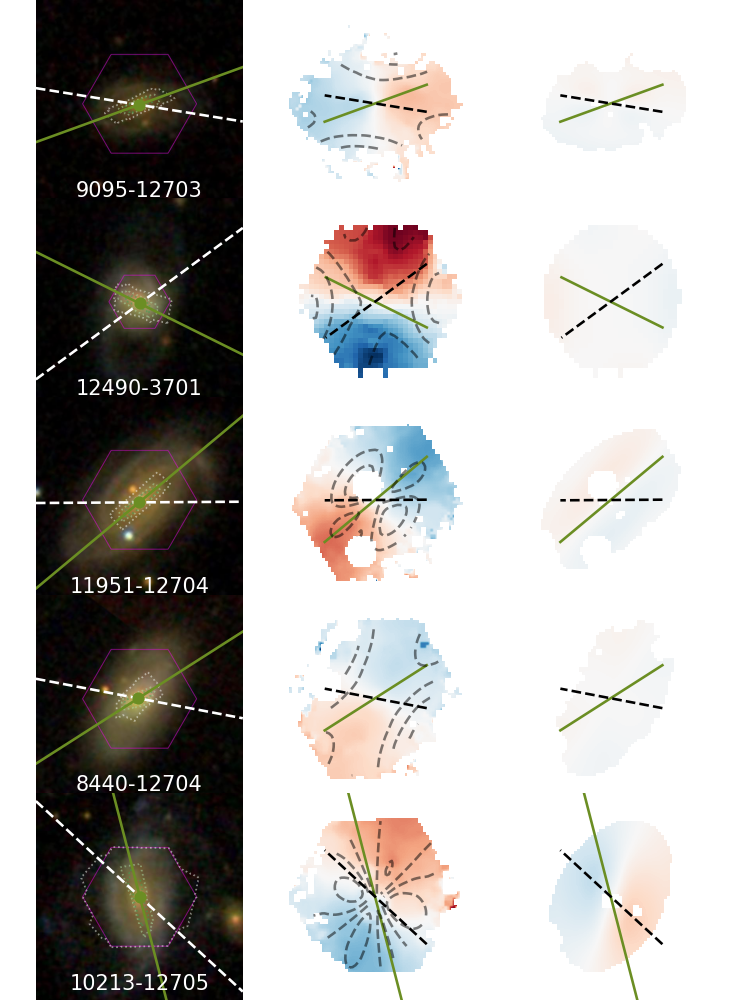

Reading /media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/9095/12703/manga-9095-12703-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz ... 
Done
----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: 0.2 +/- 0.0
                Y center: -0.1 +/- 0.0
          Position Angle: -83.6 +/- 0.0
             Inclination: 48.1 +/- 0.1
       Systemic Velocity: -4.8 +/- 0.1
----------
Rotation curve parameters:
    RC: Asymptotic value: 237.5 +/- 0.2
               RC: Scale: 1.8 +/- 0.0
----------
Velocity measurements: 2642
Velocity chi-square: 62555.89972739115
Reduced chi-square: 23.740379403184498
----------------------------------------------------------------------
--------

----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: 0.2 +/- 0.0
                Y center: -0.1 +/- 0.0
          Position Angle: -83.3 +/- 0.0
             Inclination: 49.4 +/- 0.1
       Systemic Velocity: -4.3 +/- 0.1
----------
Rotation curve parameters:
    RC: Asymptotic value: 238.2 +/- 0.2
               RC: Scale: 1.8 +/- 0.0
----------
Velocity measurements: 1327
Velocity chi-square: 26696.024008459586
Reduced chi-square: 20.224260612469383
----------------------------------------------------------------------
----------------------------------------------------------------------
                              Fit Result                              
----------------------

Reading /media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/12490/3701/manga-12490-3701-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz ... 
Done
----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: -0.3 +/- 0.0
                Y center: -0.1 +/- 0.0
          Position Angle: -7.3 +/- 0.1
             Inclination: 46.0 +/- 0.4
       Systemic Velocity: -7.9 +/- 0.2
----------
Rotation curve parameters:
    RC: Asymptotic value: 132.9 +/- 0.5
               RC: Scale: 3.4 +/- 0.0
----------
Velocity measurements: 748
Velocity chi-square: 10132.521528733405
Reduced chi-square: 13.67411812244724
----------------------------------------------------------------------
---------

----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: -0.3 +/- 0.0
                Y center: -0.1 +/- 0.0
          Position Angle: -7.3 +/- 0.1
             Inclination: 45.7 +/- 0.4
       Systemic Velocity: -8.1 +/- 0.2
----------
Rotation curve parameters:
    RC: Asymptotic value: 133.2 +/- 0.5
               RC: Scale: 3.4 +/- 0.0
----------
Velocity measurements: 660
Velocity chi-square: 9371.163053856972
Reduced chi-square: 14.350938826733493
----------------------------------------------------------------------


Reading /media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/11951/12704/manga-11951-12704-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz ... 
Done
----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: -0.1 +/- 0.0
                Y center: -0.0 +/- 0.0
          Position Angle: 134.3 +/- 0.0
             Inclination: 56.3 +/- 0.1
       Systemic Velocity: -0.2 +/- 0.2
----------
Rotation curve parameters:
    RC: Asymptotic value: 252.7 +/- 0.3
               RC: Scale: 5.3 +/- 0.0
----------
Velocity measurements: 2507
Velocity chi-square: 28259.761785590323
Reduced chi-square: 11.303904714236129
----------------------------------------------------------------------
----

----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: -0.1 +/- 0.0
                Y center: -0.0 +/- 0.0
          Position Angle: 133.9 +/- 0.0
             Inclination: 55.4 +/- 0.1
       Systemic Velocity: 0.9 +/- 0.2
----------
Rotation curve parameters:
    RC: Asymptotic value: 253.8 +/- 0.3
               RC: Scale: 5.4 +/- 0.0
----------
Velocity measurements: 1540
Velocity chi-square: 12221.464925170296
Reduced chi-square: 7.972253702002802
----------------------------------------------------------------------
----------------------------------------------------------------------
                              Fit Result                              
-----------------------

Reading /media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/8440/12704/manga-8440-12704-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz ... 
Done
----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: The maximum number of function evaluations is exceeded.
Fit status: 0
Fit success: False
----------
Base parameters:
                X center: 11.2 +/- 0.0
                Y center: 3.5 +/- 0.0
          Position Angle: 217.6 +/- 0.0
             Inclination: 54.7 +/- 0.0
       Systemic Velocity: -285.1 +/- 0.2
----------
Rotation curve parameters:
    RC: Asymptotic value: 475.6 +/- 0.2
               RC: Scale: 0.1 +/- 0.0
----------
Velocity measurements: 2602
Velocity chi-square: 1321879.323401892
Reduced chi-square: 509.3947296346405
----------------------------------------------------------------

----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: -0.0 +/- 0.0
                Y center: 0.0 +/- 0.0
          Position Angle: 148.0 +/- 0.0
             Inclination: 43.6 +/- 0.2
       Systemic Velocity: 22.8 +/- 0.1
----------
Rotation curve parameters:
    RC: Asymptotic value: 162.0 +/- 0.2
               RC: Scale: 3.0 +/- 0.0
----------
Velocity measurements: 1471
Velocity chi-square: 9193.437063079866
Reduced chi-square: 6.279670125054553
----------------------------------------------------------------------
----------------------------------------------------------------------
                              Fit Result                              
------------------------

Reading /media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/10213/12705/manga-10213-12705-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz ... 
Done
----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: 0.2 +/- 0.0
                Y center: -0.4 +/- 0.0
          Position Angle: -28.1 +/- 0.0
             Inclination: 36.6 +/- 0.2
       Systemic Velocity: 7.6 +/- 0.1
----------
Rotation curve parameters:
    RC: Asymptotic value: 144.1 +/- 0.1
               RC: Scale: 6.0 +/- 0.0
----------
Velocity measurements: 2711
Velocity chi-square: 99952.28713550561
Reduced chi-square: 36.9646032305864
----------------------------------------------------------------------
---------

----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: 0.6 +/- 0.0
                Y center: -0.8 +/- 0.0
          Position Angle: -29.5 +/- 0.0
             Inclination: 28.5 +/- 0.3
       Systemic Velocity: 1.3 +/- 0.1
----------
Rotation curve parameters:
    RC: Asymptotic value: 145.2 +/- 0.2
               RC: Scale: 6.4 +/- 0.0
----------
Velocity measurements: 1784
Velocity chi-square: 61322.422533600744
Reduced chi-square: 34.50896034530149
----------------------------------------------------------------------
----------------------------------------------------------------------
                              Fit Result                              
------------------------

In [46]:
def prepfiles(plate, ifu, stellar=False,dir='barred',root='/media/brian/bdigiorg/'):
    vftype = 'Stars' if stellar else 'Gas'
    f = fits.open(f'/media/brian/bdigiorg/nirvana/lux/{dir}/nirvana_{plate}-{ifu}_{vftype}.fits')
    maps = fits.open(f'{root}/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/{plate}/{ifu}/manga-{plate}-{ifu}-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz')
    projpab = projectedpab(f[1].data['pab'], f[1].data['pa'], f[1].data['inc'])
    gz = fits.open(glob(f'{root}/GZ3D/gz3d_{f[0].header["mangaid"]}*.fits.gz')[0])
    drpall = fits.open(f'{root}/manga/spectro/redux/DR17/drpall-v3_1_1.fits')[1].data
    drp = drpall[drpall['plateifu'] == f'{plate}-{ifu}']
    d = {}
    for k in ['f','maps','gz','projpab','drp']:
        exec(f'd["{k}"] = {k}')
    return d

plt.figure(figsize=(6,8))
drpall = fits.open('/media/brian/bdigiorg/manga/spectro/redux/DR17/drpall-v3_1_1.fits')[1].data
n = 0
pabes = pabus - pabls
good = pabes < 20
pis = np.array(pis)
while n < 5:
    #try:
        pi = np.random.choice(pis[good])
        plt.subplot(5,3,3*n+1)
        plate,ifu,vftype = (*pi.split('-'), 'Gas')
        d = prepfiles(plate,ifu,vftype=='Stars',dir='barred/sample/')
        for i in range(len(d['gz'])):
            d['gz'][i].data = np.flip(d['gz'][i].data, 0)
        drp = drpall[drpall['plateifu']==f'{plate}-{ifu}']

        vel = np.ma.array(d['maps']['emline_gvel'].data[0], mask=d['maps']['emline_gvel_mask'].data[0]) - d['f'][1].data['vsys']
        nang = d['f'][1].data['pab']
        ncen = (d['f'][1].data['xc'], d['f'][1].data['yc'])
        ppa = drp['nsa_elpetro_phi']

        plt.imshow(d['gz'][0].data, origin='lower')
        plt.tick_params(left=None, bottom=None, labelleft=None, labelbottom=None)
        bar = d['gz'][4].data
        xx = np.linspace(0,bar.shape[0],bar.shape[0])
        yy = np.linspace(0,bar.shape[1],bar.shape[1])
        x,y = np.meshgrid(xx,yy)

        if bar.any():
            gzang, gzcen, tots, smoothtots, maxbin, centtots, cen = gzbarang3(d['gz'])#, returncen=True)
            xcen = np.average(x, weights=bar)
            ycen = np.average(y, weights=bar)
            x -= xcen
            y -= ycen
            gzpab = gzang
            npab = d['projpab']
            gzpa = ppa
            npa = d['f'][1].data['pa']

            plt.contour(d['gz'][4].data,cmap='Greens',levels=2, linestyles=':', alpha=.5, linewidths=1)
            plt.plot(x[0]+gzcen[0], x[0]*np.tan(np.radians(gzpab - 90)) + gzcen[1], 'olivedrab', label='GZ:3D')
            plt.plot(x[0]+gzcen[0], x[0]*np.tan(np.radians(npab - 90)) + gzcen[1], 'w--', label='Nirvana')
            plt.plot(*gzcen, 'o', c='olivedrab')

        else: 
            xcen, ycen = (0,0)

        plt.xlim((0,d['gz'][0].data.shape[0]))
        plt.ylim((0,d['gz'][0].data.shape[1]))
        handles, labels = plt.gca().get_legend_handles_labels()
        handles.append(Line2D([0], [0], label='Bar', color='g', ls=':'))
        handles.append(Line2D([0], [0], label='MaNGA\nIFU', color='m', ls='-'))
        plt.axis('off')
        
        plt.text(.5,.05,pi,transform=plt.gca().transAxes,horizontalalignment='center',fontsize=12,c='w')
        
        plt.subplot(5,3,3*n+2)
        x = d['maps']['spx_skycoo'].data[0]
        xcen = x.shape[0]//2
        vmax = np.max(np.abs(vel))
        plt.imshow(vel, cmap='RdBu_r', origin='lower', vmin=-vmax, vmax=vmax)
        fname = f'/media/brian/bdigiorg/nirvana/lux/barred/sample/nirvana_{plate}-{ifu}_{vftype}.fits'
        args, resdict = fileprep(fname, rootdir='/media/brian/bdigiorg/manga/spectro')
        args.clip()
        z = np.zeros(len(resdict['vt']))
        vtdict, v2tdict, v2rdict = [resdict.copy(), resdict.copy(), resdict.copy()]
        vtdict['v2t'] = z
        vtdict['v2r'] = z
        v2tdict['vt'] = z
        v2tdict['v2r'] = z
        v2rdict['vt'] = z
        v2rdict['v2t'] = z
        velmodel, sigmodel = bisym_model(args, resdict, plot=True)
        vtmodel,  sigmodel = bisym_model(args, vtdict,  plot=True)
        v2tmodel, sigmodel = bisym_model(args, v2tdict, plot=True)
        v2rmodel, sigmodel = bisym_model(args, v2rdict, plot=True)
        plt.axis('off')

        if bar.any():
            plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(gzpab - 90)) + xcen, 'olivedrab', label='GZ')
            plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(npab - 90)) + xcen, 'k--', label='N pab')
        #plt.plot(x[0]+xcen, x[0]*np.tan(np.radians(npa - 90)) + xcen, 'k--', label='N pa')
        #plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(gzpa - 90)) + xcen, 'g--', label='pPA')
        plt.contour(velmodel-vtmodel-v2tmodel-d['f'][1].data['vsys'],colors='k',levels=5, linestyles='--', alpha=.5)
        plt.xlim((0,x.shape[0]))
        plt.ylim((0,x.shape[1]))
        #plt.legend()
        
        plt.subplot(5,3,3*n+3)
        plt.imshow(velmodel-vtmodel,cmap='RdBu_r', origin='lower', vmin=-vmax, vmax=vmax)
        if bar.any():
            plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(gzpab - 90)) + xcen, 'olivedrab', label='GZ')
            plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(npab - 90)) + xcen, 'k--', label='Nirv')
        #plt.plot(x[xcen]+xcen, x[xcen]*np.tan(np.radians(gzpa - 90)) + xcen, 'g--', label='pPA')
        #plt.plot(x[0]+xcen, x[0]*np.tan(np.radians(npa - 90)) + xcen, 'k--', label='N pa')
        plt.xlim((0,x.shape[0]))
        plt.ylim((0,x.shape[1]))
        plt.axis('off')
        #plt.legend()
        
        n += 1
    #except:
    #    print('failed')
#plt.cla()
#plt.axis('off')
#plt.legend(handles=handles, facecolor='.7', loc=4)
plt.tight_layout(pad=0, h_pad=-.5, w_pad=-.5)
#plt.savefig('imagemosaic.pdf', format='pdf')

In [6]:
datadir='/media/brian/bdigiorg/nirvana/lux/marchrun/'
mgas = makealltable('nirvana_',datadir=datadir,vftype='Gas', mangadir='/media/brian/bdigiorg/manga/')
#stars = makealltable('nirvana_',datadir=datadir,vftype='Stars', mangadir='/media/brian/bdigiorg/manga/')
mgpi = [f"{mgas['plate'][i]}-{mgas['ifu'][i]}" for i in range(len(mgas))]
#spi = [f"{stars['plate'][i]}-{stars['ifu'][i]}" for i in range(len(stars))]

2392 files found...


100%|█████████████████████████████████████████████████████████████████| 2392/2392 [00:39<00:00, 60.06it/s]


In [7]:
datadir='/media/brian/bdigiorg/nirvana/lux/christmasrun/'
cgas = makealltable('nirvana_',datadir=datadir,vftype='Gas', mangadir='/media/brian/bdigiorg/manga/')
#stars = makealltable('nirvana_',datadir=datadir,vftype='Stars', mangadir='/media/brian/bdigiorg/manga/')
cgpi = [f"{cgas['plate'][i]}-{cgas['ifu'][i]}" for i in range(len(cgas))]
#spi = [f"{stars['plate'][i]}-{stars['ifu'][i]}" for i in range(len(stars))]

5357 files found...


100%|█████████████████████████████████████████████████████████████████| 5357/5357 [01:34<00:00, 56.68it/s]


<IPython.core.display.Javascript object>


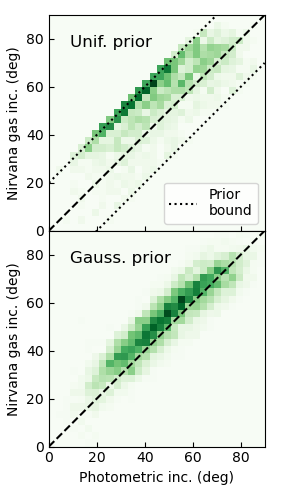

2183 2392
5206 5357


In [162]:
def makeplot(xdata, ydata, color, alpha=.7):
    plt.scatter(xdata, ydata, c=color, s=5,alpha=alpha, cmap='jet')
    ax = plt.gca()
    ax.set_aspect(1)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    line = np.linspace(min(xmin,ymin),max(xmax,ymax))
    plt.plot(line,line,'k--')

drp = fits.open('/media/brian/bdigiorg/manga/spectro/redux/DR17/drpall-v3_1_1.fits')[1].data
ppi = [f"{drp['plate'][i]}-{drp['ifudsgn'][i]}" for i in range(len(drp))]
ppa = drp['nsa_elpetro_phi']
#pinc = np.degrees(np.arccos(drp['nsa_elpetro_ba']))
q0 = .2
pinc = np.degrees(np.arccos(np.sqrt((drp['nsa_elpetro_ba']**2-q0**2) / (1 - q0**2))))
pinc[q < q0] = 90

plt.figure(figsize=(3,5))
a = ((mgas,mgpi,'Unif.'), (cgas,cgpi, 'Gauss.'))
for j in range(2):
    gas, gpi, prior = a[j]
    pmatch = np.zeros(len(gpi),dtype=int)
    for i in range(len(gpi)):
        try: pmatch[i] = ppi.index(gpi[i])
        except: pass
    good = (pmatch != 0) & (ppa[pmatch] > -1000)

    plt.subplot(211+j)
    print(len(pinc[pmatch][good]), len(gas['inc']))
    plt.hist2d(pinc[pmatch][good], gas['inc'][good], cmap='Greens',range=((0,90),(0,90)),bins=30)
    plt.plot(np.linspace(0,90,90), np.linspace(0,90,90), 'k--')
    plt.xlabel('Photometric inc. (deg)')
    plt.ylabel('Nirvana gas inc. (deg)')
    if j==0: 
        plt.tick_params(direction='in', labelbottom=False)
        plt.plot(np.linspace(0,90,90), np.linspace(0,90,90)+20, 'k:',label='Prior\nbound')
        plt.plot(np.linspace(0,90,90), np.linspace(0,90,90)-20, 'k:')
        plt.legend(loc=4)
    plt.gca().set_aspect(1)
    plt.text(.1,.85,f'{prior} prior', transform=plt.gca().transAxes, 
             horizontalalignment='left', fontsize=12)
plt.tick_params(direction='in', labelbottom=True)
plt.tight_layout(h_pad=-1.3)
plt.gcf().subplots_adjust(hspace=0)
plt.savefig('incpriors.pdf', format='pdf')

In [50]:
datadir='/media/brian/bdigiorg/nirvana/lux/barred/sample/'
sgas = makealltable('nirvana_',datadir=datadir,vftype='Gas', mangadir='/media/brian/bdigiorg/manga/')
#stars = makealltable('nirvana_',datadir=datadir,vftype='Stars', mangadir='/media/brian/bdigiorg/manga/')
sgpi = [f"{mgas['plate'][i]}-{mgas['ifu'][i]}" for i in range(len(mgas))]

1118 files found...


100%|██████████████████████████████████████| 1118/1118 [00:47<00:00, 23.49it/s]


<IPython.core.display.Javascript object>


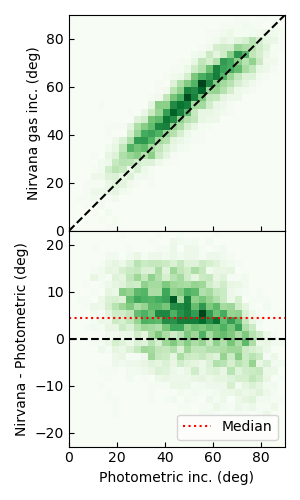

4.393298603476385


In [80]:
drp = fits.open('/media/brian/bdigiorg/manga/spectro/redux/DR17/drpall-v3_1_1.fits')[1].data
ppi = [f"{drp['plate'][i]}-{drp['ifudsgn'][i]}" for i in range(len(drp))]
ppa = drp['nsa_elpetro_phi']
#pinc = np.degrees(np.arccos(drp['nsa_elpetro_ba']))
q0 = .2
pinc = np.degrees(np.arccos(np.sqrt((drp['nsa_elpetro_ba']**2-q0**2) / (1 - q0**2))))
pinc[q < q0] = 90


plt.figure(figsize=(3,5))
pmatch = np.zeros(len(gpi),dtype=int)
for i in range(len(gpi)):
    try: pmatch[i] = ppi.index(gpi[i])
    except: pass
good = (pmatch != 0) & (ppa[pmatch] > -1000)
xdata = pinc[pmatch][good]
ydata = gas['inc'][good]

plt.subplot(211)
plt.hist2d(xdata, ydata, cmap='Greens',range=((0,90),(0,90)),bins=30)
plt.plot(np.linspace(0,90,90), np.linspace(0,90,90), 'k--')
plt.xlabel('Photometric inc. (deg)')
plt.ylabel('Nirvana gas inc. (deg)')
plt.tick_params(direction='in', labelbottom=False)
plt.gca().set_aspect(1)

plt.subplot(212)
plt.hist2d(xdata, ydata-xdata, cmap='Greens',range=((0,90),(-23,23)),bins=30)
plt.axhline(0, c='k', ls='--')
plt.axhline(np.nanmedian(ydata-xdata), c='r', ls=':', label='Median')
plt.xlabel('Photometric inc. (deg)')
plt.ylabel('Nirvana - Photometric (deg)')
plt.tick_params(direction='in', labelbottom=True)
plt.legend(loc=4)

plt.tight_layout(h_pad=-1.3)
plt.gcf().subplots_adjust(hspace=0)
print(np.nanmedian(ydata-xdata))
plt.savefig('incbias.pdf', format='pdf')

In [75]:
q = drp[pmatch][good]['nsa_elpetro_ba']
q0 = .2
pinc = np.degrees(np.arccos(np.sqrt((q**2-q0**2) / (1 - q0**2))))
pinc[q < q0] = 90

<IPython.core.display.Javascript object>


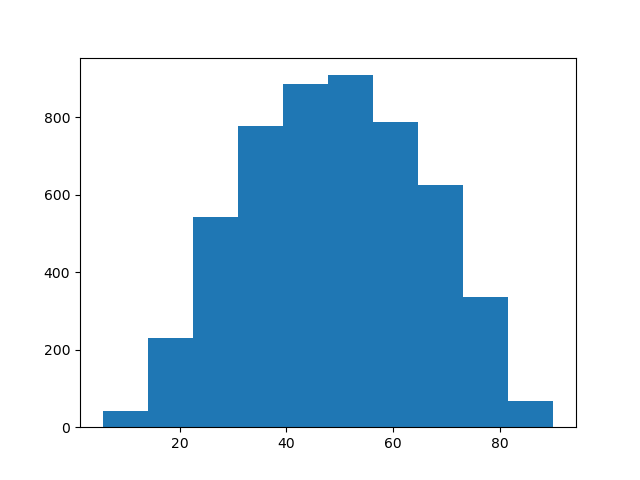

(array([ 43., 230., 543., 778., 886., 909., 789., 626., 335.,  67.]),
 array([ 5.54670606, 13.99203546, 22.43736485, 30.88269424, 39.32802364,
        47.77335303, 56.21868242, 64.66401182, 73.10934121, 81.55467061,
        90.        ]),
 <BarContainer object of 10 artists>)

In [76]:
plt.figure()
plt.hist(pinc)

<IPython.core.display.Javascript object>


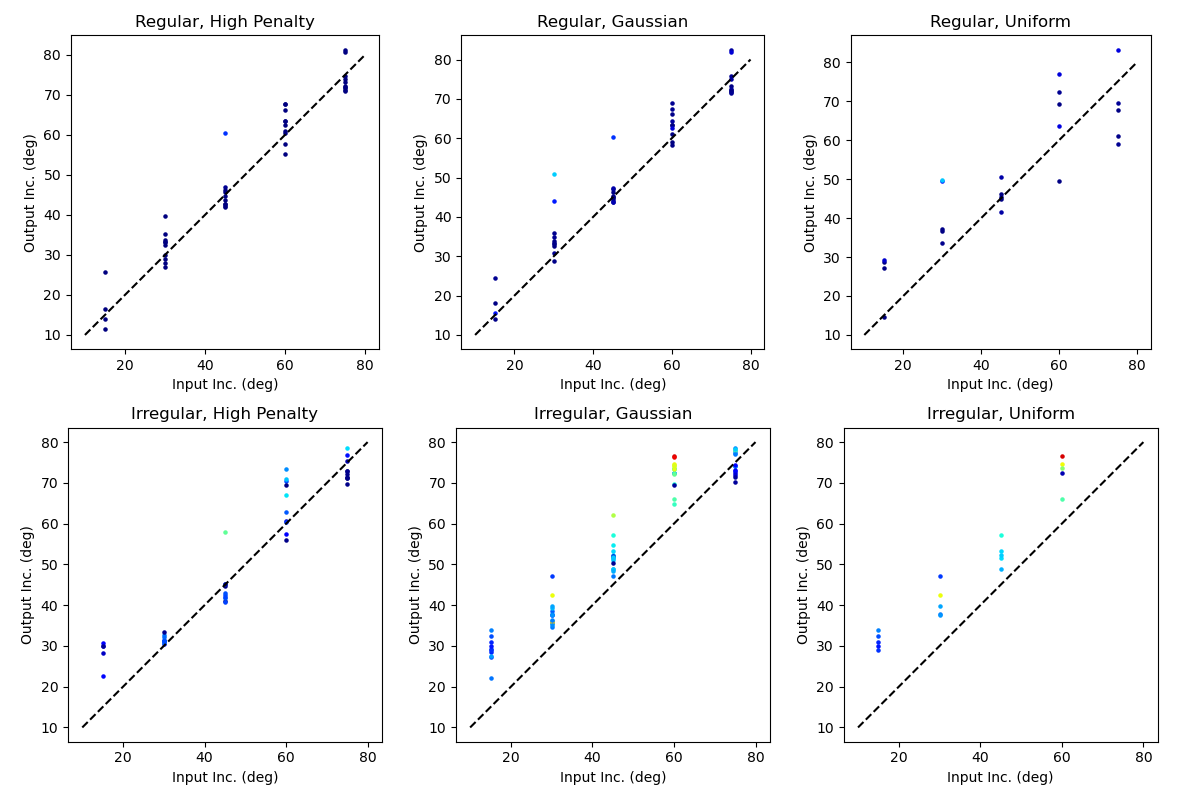

In [83]:
def one2oneplot(plate,ifu,priordir='gaussprior',color=None):
    fs = glob(f'/media/brian/bdigiorg/nirvana/lux/mocks/{priordir}/nirvana_{plate}-{ifu}_Gas_mock_i??_r*.fits')
    for fi in fs:
        inc = int(fi[fi.find('_i')+2:fi.find('_r')])
        with fits.open(fi) as f:
            if color is not None:
                if color == 'vsig':
                    c = np.log10(np.max(f[1].data['vt'])/np.max(f[1].data['sig']))
                    plt.scatter(inc, f[1].data['inc'], c=c, cmap='jet',s=5,vmin=-1, vmax=1)
                if color == 'v2r':
                    c = np.max(f[1].data['v2r'])
                    plt.scatter(inc, f[1].data['inc'], c=c, cmap='jet',s=5, vmin=0, vmax=200)
            else:
                plt.plot(inc, f[1].data['inc'], 'k.')
    plt.xlabel('Input Inc. (deg)')
    plt.ylabel('Output Inc. (deg)')
    x = np.linspace(10,80,100)
    plt.plot(x,x,'k--')
    plt.gca().set_aspect(1)
    plt.tight_layout()

plt.figure(figsize=(12,8))
color = 'v2r'
plt.subplot(231)
one2oneplot(7965,3704,'500pen',color)
plt.title('Regular, High Penalty')
plt.subplot(232)
one2oneplot(7965,3704,'gaussprior',color)
plt.title('Regular, Gaussian')
plt.subplot(233)
one2oneplot(7965,3704,'unifprior',color)
plt.title('Regular, Uniform')
plt.subplot(234)
one2oneplot(11021,3703,'500pen',color)
plt.title('Irregular, High Penalty')
plt.subplot(235)
one2oneplot(11021,3703,'gaussprior',color)
plt.title('Irregular, Gaussian')
plt.subplot(236)
one2oneplot(11021,3703,'unifprior',color)
plt.title('Irregular, Uniform')
plt.tight_layout()



<IPython.core.display.Javascript object>


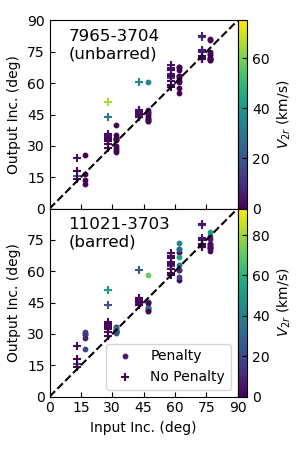

In [172]:
plt.figure(figsize=(3,4.5))
cmap = 'viridis'

plt.subplot(211)
fs = glob(f'/media/brian/bdigiorg/nirvana/lux/mocks/500pen/nirvana_7965-3704_Gas_mock_i??_r*.fits')
cs1 = []
cs2 = []
vmin, vmax = (0,75)

x = np.linspace(0,90,100)
plt.plot(x,x,'k--')
for fi in fs:
    inc = int(fi[fi.find('_i')+2:fi.find('_r')])
    with fits.open(fi) as f:
        c = np.max(f[1].data['v2r'])
        cs1 += [c]
        plt.scatter(inc+2, f[1].data['inc'], c=c, cmap=cmap,s=10, vmin=vmin, vmax=vmax)
        
fs = glob(f'/media/brian/bdigiorg/nirvana/lux/mocks/gaussprior/nirvana_7965-3704_Gas_mock_i??_r*.fits')
for fi in fs:
    inc = int(fi[fi.find('_i')+2:fi.find('_r')])
    with fits.open(fi) as f:
        c = np.max(f[1].data['v2r'])
        cs2 += [c]
        plt.scatter(inc-2, f[1].data['inc'], c=c, cmap=cmap,s=30, marker='+', vmin=vmin, vmax=vmax)
        
plt.ylabel('Output Inc. (deg)')
plt.gca().set_aspect(1)
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0,15,30,45,60,75,90])
plt.xlim(0,90)
plt.ylim(0,90)
plt.tick_params(direction='in', labelbottom=False)
plt.text(.1,.8,f'7965-3704\n(unbarred)', transform=plt.gca().transAxes, 
         horizontalalignment='left', fontsize=12)

#csmax = max((np.max(cs1),np.max(cs2)))
#cm = plt.get_cmap(cmap)
#colors = cm(np.linspace(1.-csmax/float(csmax), 1, cm.N))
#color_map = LinearSegmentedColormap.from_list('cut_'+cmap, colors)
cax = mal(plt.gca()).append_axes('right', size='5%', pad=0)
#plt.colorbar(ScalarMappable(plt.Normalize(0,max((np.max(cs1),np.max(cs2)))), cmap), 
plt.colorbar(ScalarMappable(plt.Normalize(vmin,vmax), cmap), 
             cax=cax, orientation='vertical',label=r'$V_{2r}$ (km/s)')
plt.tick_params(direction='in')

plt.subplot(212)
fs = glob(f'/media/brian/bdigiorg/nirvana/lux/mocks/500pen/nirvana_11021-3703_Gas_mock_i??_r*.fits')
cs1 = []
cs2 = []
vmin, vmax = (0,120)
x = np.linspace(0,90,100)
plt.plot(x,x,'k--')
for fi in fs:
    inc = int(fi[fi.find('_i')+2:fi.find('_r')])
    with fits.open(fi) as f:
        c = np.max(f[1].data['v2r'])
        cs1 += [c]
        if fi == fs[-1]:
            plt.scatter(inc+2, f[1].data['inc'], c=c, cmap=cmap,s=10, vmin=vmin, vmax=vmax, label='Penalty')
        else:
            plt.scatter(inc+2, f[1].data['inc'], c=c, cmap=cmap,s=10, vmin=vmin, vmax=vmax)
        
fs = glob(f'/media/brian/bdigiorg/nirvana/lux/mocks/gaussprior/nirvana_7965-3704_Gas_mock_i??_r*.fits')
for fi in fs:
    inc = int(fi[fi.find('_i')+2:fi.find('_r')])
    with fits.open(fi) as f:
        c = np.max(f[1].data['v2r'])
        cs2 += [c]
        if fi == fs[-1]:
            plt.scatter(inc-2, f[1].data['inc'], c=c, cmap=cmap,s=30, marker='+', vmin=vmin, vmax=vmax, label='No Penalty')
        else:
            plt.scatter(inc-2, f[1].data['inc'], c=c, cmap=cmap,s=30, marker='+', vmin=vmin, vmax=vmax)
        
plt.xlabel('Input Inc. (deg)')
plt.ylabel('Output Inc. (deg)')
plt.gca().set_aspect(1)
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0,15,30,45,60,75])
plt.xlim(0,90)
plt.ylim(0,90)
plt.tick_params(direction='in')
plt.text(.1,.8,f'11021-3703\n(barred)', transform=plt.gca().transAxes, 
         horizontalalignment='left', fontsize=12)
plt.legend(loc=4)

cax = mal(plt.gca()).append_axes('right', size='5%', pad=0)
plt.colorbar(ScalarMappable(plt.Normalize(0,max((np.max(cs1),np.max(cs2)))),cmap), 
             cax=cax, orientation='vertical',label=r'$V_{2r}$ (km/s)')
plt.tick_params(direction='in')

plt.tight_layout(rect=(.04,0,.96,1))
plt.gcf().subplots_adjust(hspace=0)
plt.savefig('penaltybias.pdf', format='pdf')

<IPython.core.display.Javascript object>


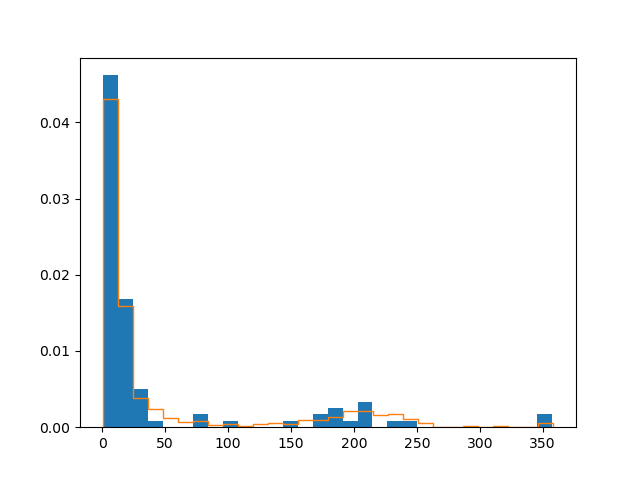

100


(array([4.30545809e-02, 1.59489143e-02, 3.81875413e-03, 2.39608102e-03,
        1.19804051e-03, 6.73897788e-04, 7.48775320e-04, 2.99510128e-04,
        3.74387660e-04, 1.49755064e-04, 3.74387660e-04, 5.24142724e-04,
        4.49265192e-04, 8.98530384e-04, 9.73407916e-04, 1.27291804e-03,
        2.17144843e-03, 2.17144843e-03, 1.64730570e-03, 1.72218324e-03,
        1.04828545e-03, 5.99020256e-04, 7.48775320e-05, 7.48775320e-05,
        1.49755064e-04, 7.48775320e-05, 1.49755064e-04, 0.00000000e+00,
        7.48775320e-05, 5.99020256e-04]),
 array([1.42414622e-01, 1.20879791e+01, 2.40335435e+01, 3.59791079e+01,
        4.79246724e+01, 5.98702368e+01, 7.18158012e+01, 8.37613657e+01,
        9.57069301e+01, 1.07652495e+02, 1.19598059e+02, 1.31543623e+02,
        1.43489188e+02, 1.55434752e+02, 1.67380317e+02, 1.79325881e+02,
        1.91271446e+02, 2.03217010e+02, 2.15162574e+02, 2.27108139e+02,
        2.39053703e+02, 2.50999268e+02, 2.62944832e+02, 2.74890397e+02,
        2.86835961e+02

In [32]:
plt.figure()
cut = np.abs(90-relgz) < 45
print(cut.sum())
plt.hist(pabes[cut], bins=30, density=True)
plt.hist(pabes, bins=30, density=True, histtype='step')

In [33]:
pabes = pabus-pabls
print(np.sum(pabes < 50))

877


Reading /media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/11021/3703/manga-11021-3703-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz ... 
Done
----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: 3.9 +/- 0.0
                Y center: -0.8 +/- 0.0
          Position Angle: -110.7 +/- 0.1
             Inclination: 1.0 +/- 21.8
       Systemic Velocity: -88.0 +/- 1.0
----------
Rotation curve parameters:
    RC: Asymptotic value: 183.5 +/- 1.3
               RC: Scale: 4.5 +/- 0.0
----------
Velocity measurements: 742
Velocity chi-square: 69096.61087255078
Reduced chi-square: 94.00899438442283
----------------------------------------------------------------------
--------

<IPython.core.display.Javascript object>


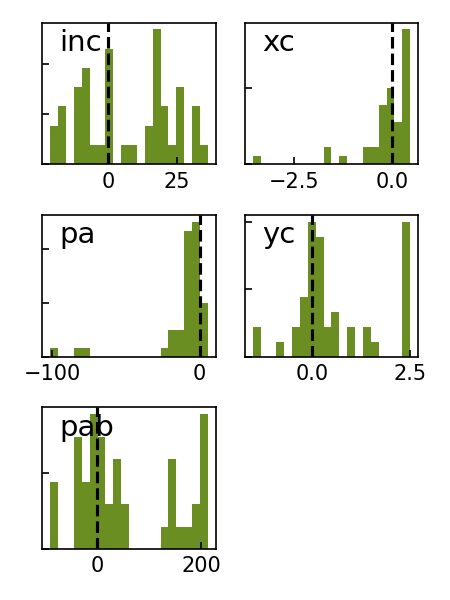

In [36]:
def recenter(arr, mod=180):
    return (arr - mod/2) % mod - mod/2

def recoveryplot(plate,ifu,param):
    fs = glob(f'/media/brian/bdigiorg/nirvana/lux/mocks/newmocks/penalty/nirvana_{plate}-{ifu}_Gas_mock_i??_r*.fits')
    recoveries = np.zeros(len(fs))
    for i in range(len(fs)):
        with fits.open(fs[i]) as f:
            recoveries[i] = f[1].data[param] - resdict[param]
    plt.hist(recoveries, bins=20, color='olivedrab',density=True)
    plt.tick_params(direction='in', labelleft=False)
    plt.text(.1,.8,param,fontsize=14,transform=plt.gca().transAxes)
    plt.axvline(0, c='k', ls='--')

plate, ifu = (11021,3703)
if plate == 11021: args, resdict = fileprep(f'/media/brian/bdigiorg/nirvana/lux/barred/sample/nirvana_{plate}-{ifu}_Gas.fits', rootdir='/media/brian/bdigiorg/manga/spectro/')
elif plate == 7965: args, resdict = fileprep(f'/media/brian/bdigiorg/nirvana/lux/mocks/newmocks/nirvana_{plate}-{ifu}_Gas.fits', rootdir='/media/brian/bdigiorg/manga/spectro/')
params = ['inc','xc','pa','yc','pab']
plt.figure(figsize=(3,4))
for i in range(len(params)):
    plt.subplot(3,2,i+1)
    recoveryplot(plate,ifu,params[i])
plt.tight_layout()

Reading /media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/7965/3704/manga-7965-3704-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz ... 
Done
----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: 0.0 +/- 0.0
                Y center: 0.1 +/- 0.0
          Position Angle: -77.3 +/- 0.1
             Inclination: 21.4 +/- 1.0
       Systemic Velocity: 1.7 +/- 0.0
----------
Rotation curve parameters:
    RC: Asymptotic value: 28.9 +/- 0.1
               RC: Scale: 3.9 +/- 0.0
----------
Velocity measurements: 818
Velocity chi-square: 9074.859985890593
Reduced chi-square: 11.18971638210924
----------------------------------------------------------------------
---------------

<IPython.core.display.Javascript object>


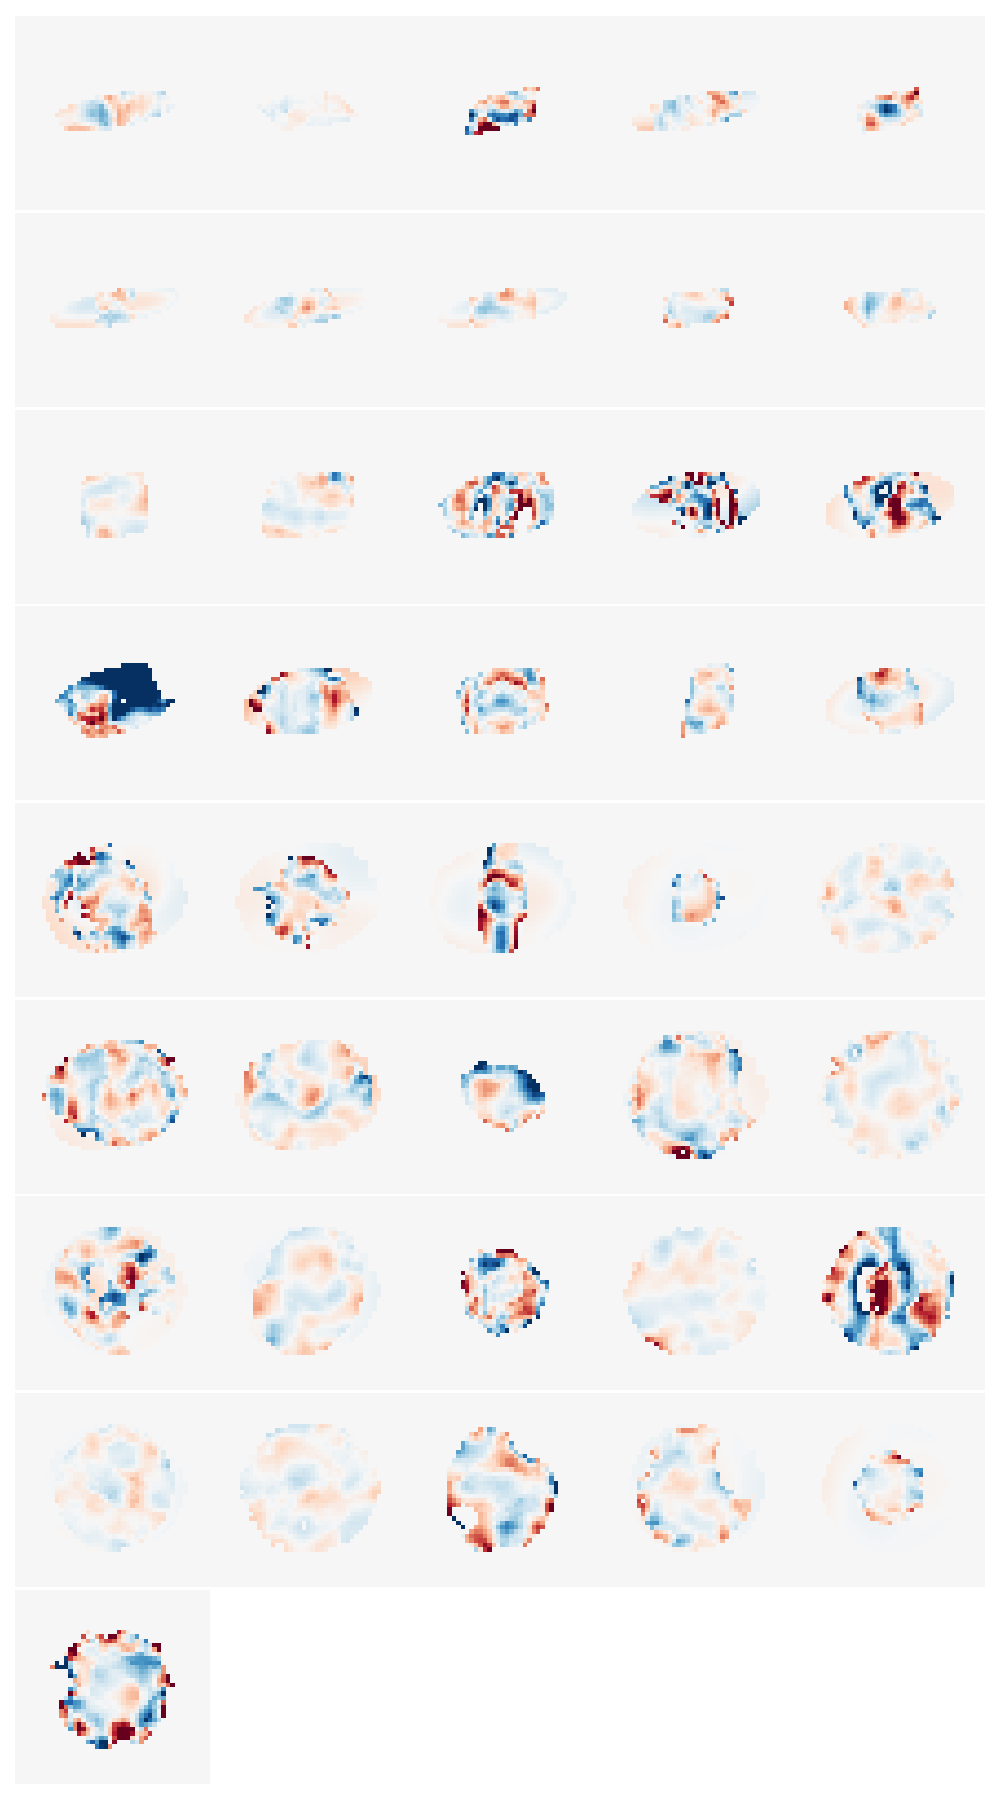

In [33]:
plate, ifu = (7965,3704)
if plate == 11021: args, resdict = fileprep(f'/media/brian/bdigiorg/nirvana/lux/barred/sample/nirvana_{plate}-{ifu}_Gas.fits', rootdir='/media/brian/bdigiorg/manga/spectro/')
elif plate == 7965: args, resdict = fileprep(f'/media/brian/bdigiorg/nirvana/lux/mocks/newmocks/nirvana_{plate}-{ifu}_Gas.fits', rootdir='/media/brian/bdigiorg/manga/spectro/')
    
fs = glob(f'/media/brian/bdigiorg/nirvana/lux/mocks/newmocks/penalty/nirvana_{plate}-{ifu}_Gas_mock_i??_r*.fits')
plt.figure(figsize=(10,18))
for i in range(len(fs)):
    with fits.open(fs[i]) as f:
        plt.subplot(9,5,i+1)
        plt.imshow(f['vel_model'].data-f['vel'].data, cmap='RdBu', origin='lower',vmin=-20,vmax=20)
        plt.axis('off')
        plt.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
plt.tight_layout(h_pad=0,w_pad=0)

Reading /media/brian/bdigiorg/manga/spectro/analysis/DR17/HYB10-MILESHC-MASTARHC2/11021/3703/manga-11021-3703-MAPS-HYB10-MILESHC-MASTARHC2.fits.gz ... 
Done
----------------------------------------------------------------------
                              Fit Result                              
----------------------------------------------------------------------
Fit status message: `ftol` termination condition is satisfied.
Fit status: 2
Fit success: True
----------
Base parameters:
                X center: 3.9 +/- 0.0
                Y center: -0.8 +/- 0.0
          Position Angle: -110.7 +/- 0.1
             Inclination: 1.0 +/- 21.8
       Systemic Velocity: -88.0 +/- 1.0
----------
Rotation curve parameters:
    RC: Asymptotic value: 183.5 +/- 1.3
               RC: Scale: 4.5 +/- 0.0
----------
Velocity measurements: 742
Velocity chi-square: 69096.61087255078
Reduced chi-square: 94.00899438442283
----------------------------------------------------------------------
--------

<IPython.core.display.Javascript object>


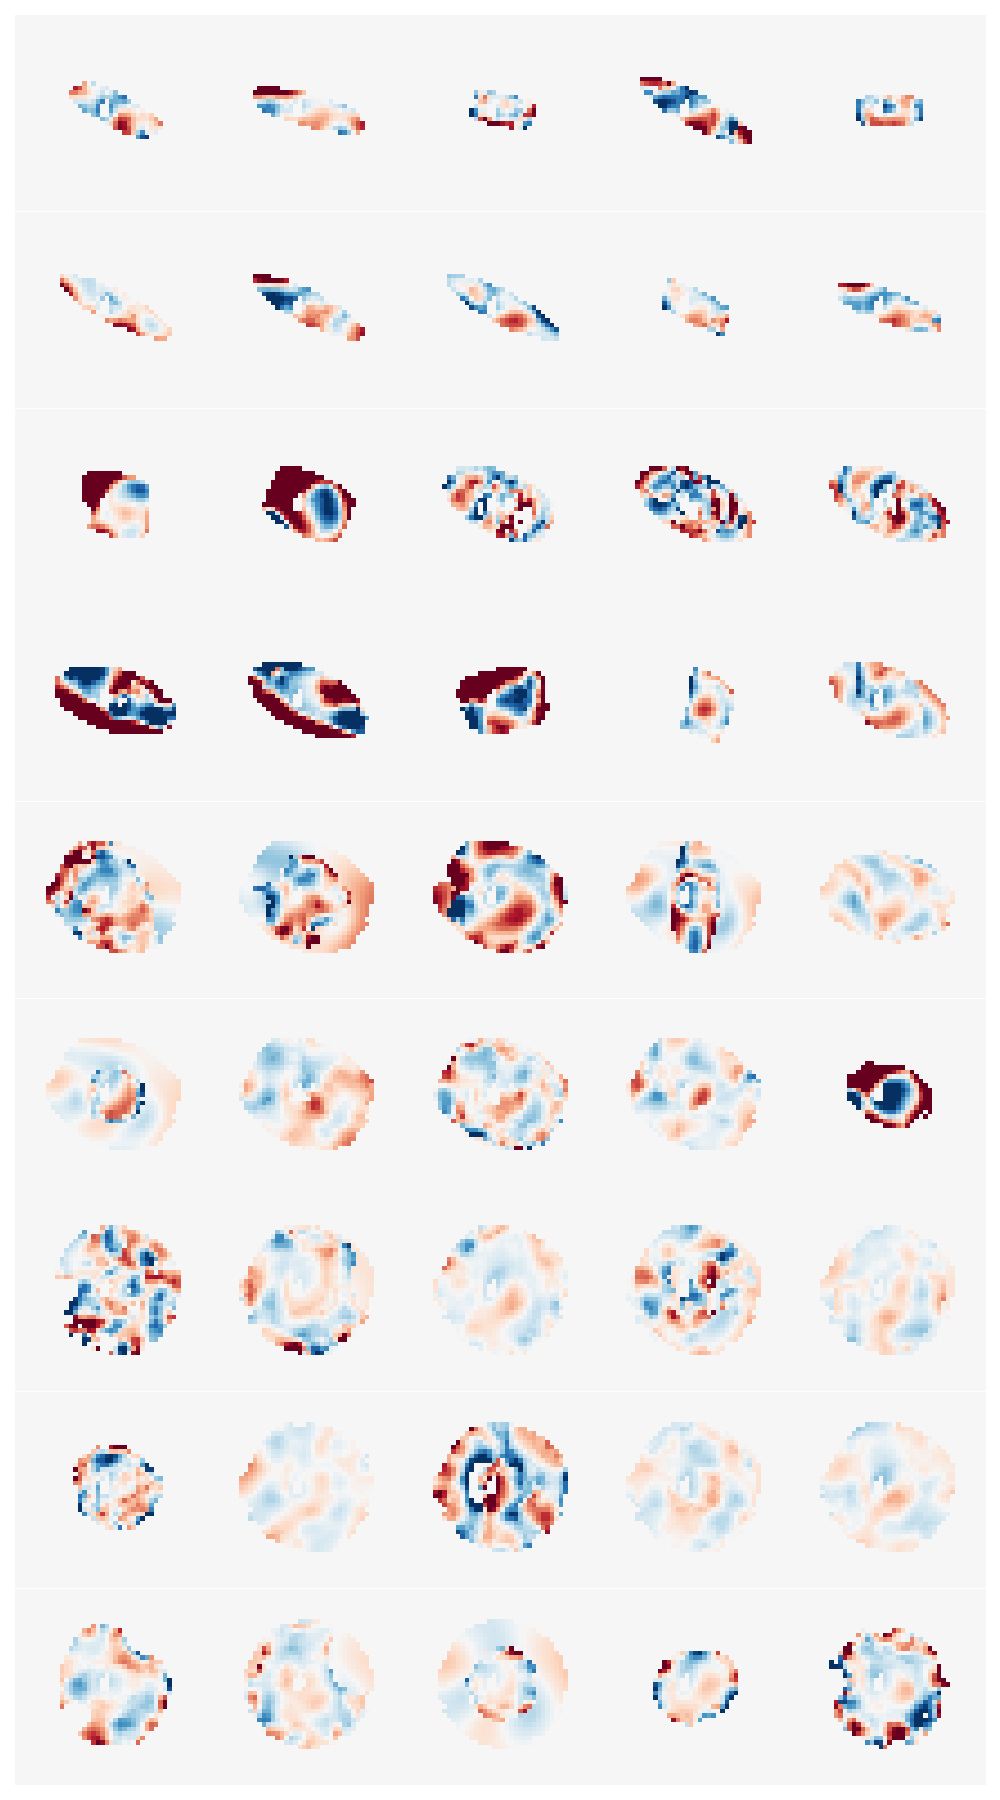

In [35]:
plate, ifu = (11021,3703)
if plate == 11021: args, resdict = fileprep(f'/media/brian/bdigiorg/nirvana/lux/barred/sample/nirvana_{plate}-{ifu}_Gas.fits', rootdir='/media/brian/bdigiorg/manga/spectro/')
elif plate == 7965: args, resdict = fileprep(f'/media/brian/bdigiorg/nirvana/lux/mocks/newmocks/nirvana_{plate}-{ifu}_Gas.fits', rootdir='/media/brian/bdigiorg/manga/spectro/')
    
fs = glob(f'/media/brian/bdigiorg/nirvana/lux/mocks/newmocks/penalty/nirvana_{plate}-{ifu}_Gas_mock_i??_r*.fits')
plt.figure(figsize=(10,18))
for i in range(len(fs)):
    with fits.open(fs[i]) as f:
        plt.subplot(9,5,i+1)
        plt.imshow(f['vel_model'].data-f['vel'].data, cmap='RdBu', origin='lower',vmin=-20,vmax=20)
        plt.axis('off')
        plt.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
plt.tight_layout(h_pad=0,w_pad=0)